In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading from html file

In [3]:
df=pd.read_html('https://cs.uwaterloo.ca/~dtompkin/music/list/Best9.html')[1]

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,#,NaN,ARTIST,TITLE,TIME,BPM,YEAR,GENRE,DISC-TRACK,DETAILS
1,1,NaN,Bob Dylan,Like a Rolling Stone,6:04,95.6,1965,Rock 1960s,POWERTRK_155-14,(details...)
2,2,NaN,The Rolling Stones,Satisfaction,3:43,134.7,1985,Rock 1980s,ESSENTLS_012-13,(details...)
3,3,NaN,John Lennon,Imagine,3:02,152.6,1971,Slow,POWERTRK_023-07,(details...)
4,4,NaN,Marvin Gaye,What's Going On,3:47,101.5,1971,Dance 1970s,POWERTRK_085-07,(details...)


## Data cleansing
- Dropping unneccessary columns

In [5]:
df.drop([0,1,8,9],axis=1,inplace=True)

In [6]:
df.columns=['Artist','Title','Time','BPM','Year','Genre']

In [7]:
df=  df.iloc[1:]
df.head()

,Artist,Title,Time,BPM,Year,Genre
1,Bob Dylan,Like a Rolling Stone,6:04,95.6,1965,Rock 1960s
2,The Rolling Stones,Satisfaction,3:43,134.7,1985,Rock 1980s
3,John Lennon,Imagine,3:02,152.6,1971,Slow
4,Marvin Gaye,What's Going On,3:47,101.5,1971,Dance 1970s
5,Aretha Franklin,Respect,2:23,114.5,1967,Rock 1960s


In [8]:
df.shape

(500, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 1 to 500
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  500 non-null    object
 1   Title   500 non-null    object
 2   Time    500 non-null    object
 3   BPM     500 non-null    object
 4   Year    500 non-null    object
 5   Genre   500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [10]:
df['Year'] = pd.to_numeric(df['Year'])
df['BPM'] = pd.to_numeric(df['BPM'])
df['Time']=pd.to_numeric(df['Time'].apply(lambda x:x.split(':')[0]))
df['Decade']=df['Year'].apply(lambda x:(x//10)*10)
df['Genre']=df['Genre'].apply(lambda x:x.split(' ')[0])

## Which artist has the most songs in the entire list?

### The Beatles, with over 20 songs, have the most songs on the list, followed by The Rolling Stones and Bob Dylan.

<BarContainer object of 10 artists>

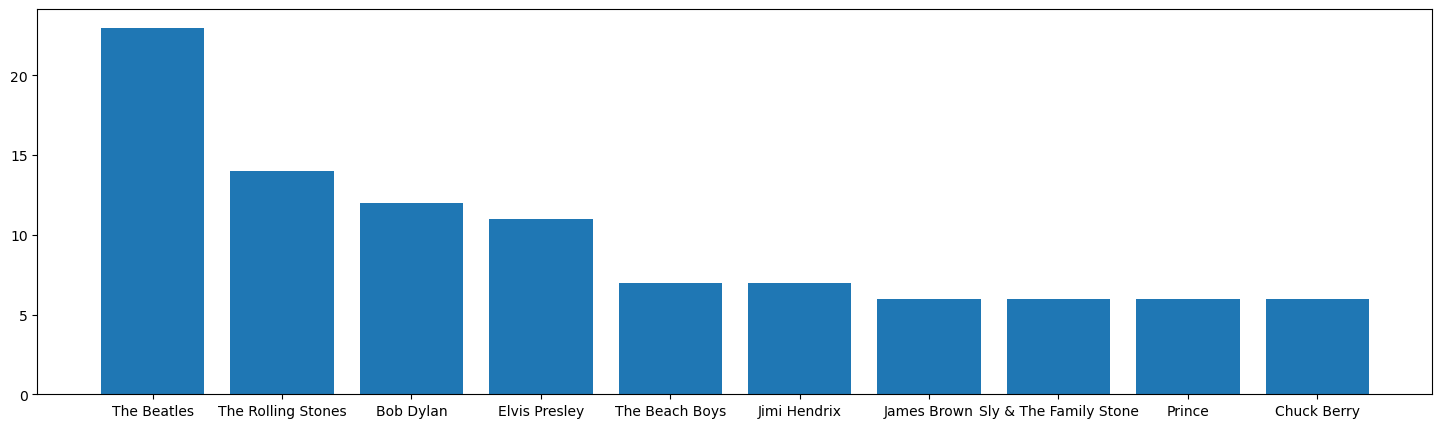

In [11]:
top10_df=df['Artist'].value_counts().head(10)
f, ax = plt.subplots(figsize=(18,5))
plt.bar(top10_df.index, top10_df)

# Who has the most songs in Top 100? 
### The Beatles with 9 songs, followed by Elvis Presley with 5 songs and The Rolling Stones with same as Bob Dylan with 4 songs


<BarContainer object of 10 artists>

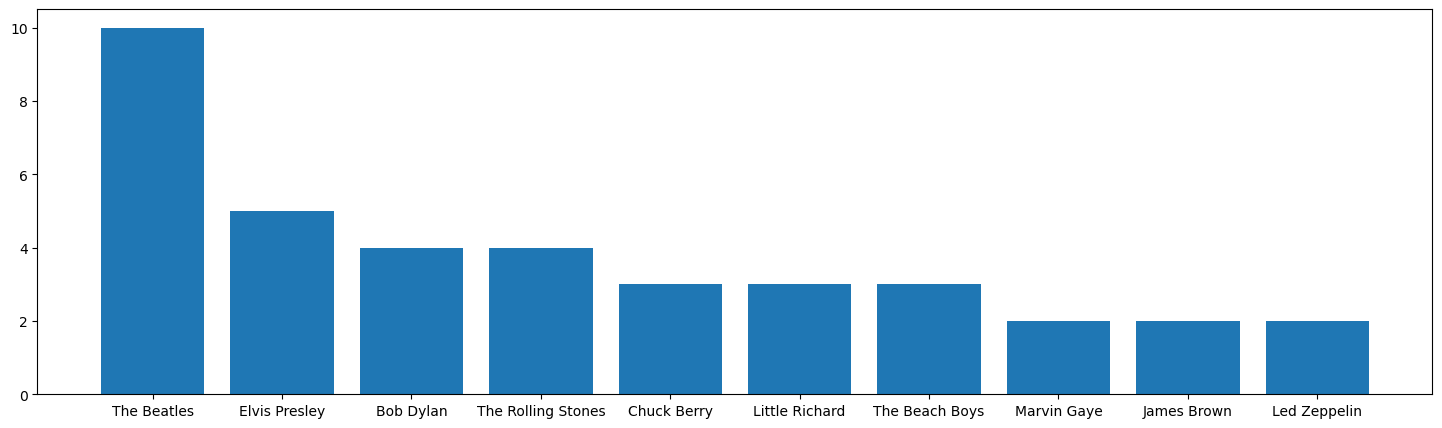

In [12]:
top10_under100 = df[:100]['Artist'].value_counts().head(10)
f, ax = plt.subplots(figsize=(18,5))
plt.bar(top10_under100.index, top10_under100)

## Top Artists by each decade
### The Beatles with 21 songs are the top artists. Also, Genre ROCK is dominant. 

In [13]:
df.groupby(['Decade','Artist','Genre'])['BPM'].count().sort_values(ascending=False).groupby(level=0, group_keys=False).head(3)

Decade  Artist                    Genre 
1960    The Beatles               Rock      21
        The Rolling Stones        TBD        7
1950    Elvis Presley             Rock       6
1960    Bob Dylan                 TBD        5
1980    U2                        Rock       4
1970    The Rolling Stones        TBD        4
1980    Prince                    Dance      4
1950    Chuck Berry               Rock       4
        Buddy Holly               Rock       4
1990    Nirvana                   Rock       3
1980    Guns N' Roses             Rock       3
1970    Al Green                  TBD        3
        Bob Marley & The Wailers  Reggae     3
1990    James Brown               TBD        3
        Jimi Hendrix              TBD        2
2000    Aretha Franklin           TBD        2
        Howlin' Wolf              TBD        2
        Public Enemy              TBD        2
Name: BPM, dtype: int64

## Number of songs included by year
### Maximum Number of songs were released in year 1969, followed by 1966 and 1965. 
### Minimum Number of Songs were released in 1953 2004 1995 respectively


<AxesSubplot:xlabel='index', ylabel='count'>

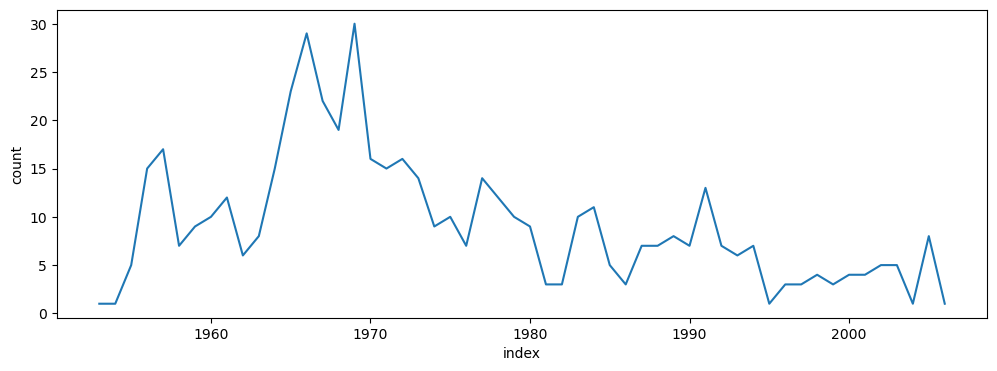

In [30]:
released_year=df['Year'].value_counts().reset_index().rename(columns={'Year':'count'})
plt.figure(figsize=(12,4))
sns.lineplot(x='index',y='count',data=released_year)


## Number of songs per decade
### Maximum songs were in 60s then in 70s. 
### Minimum songs were in 2000s (mainly due to the fact that the dataset only includes upto 2006) and 90s. 

In [33]:
df.groupby('Decade')['Artist'].count()


Decade
1950     55
1960    174
1970    123
1980     66
1990     54
2000     28
Name: Artist, dtype: int64

In [34]:
top_genre=df.groupby('Genre')[['Artist']].size().reset_index(name='count').sort_values(['count'], ascending=False)

### Rock music has dominated the world with 45.9%
### Country music is the least produced with 2.3%

array([<AxesSubplot:ylabel='count'>], dtype=object)

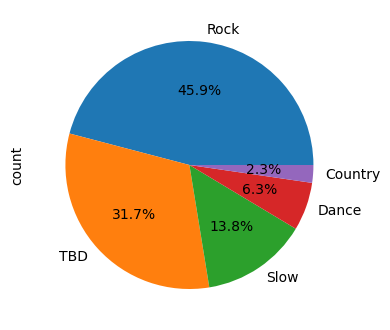

In [17]:
top_genre['count'].head(5).plot.pie(subplots=True,labels=['Rock','TBD','Slow','Dance','Country'],figsize=(4, 6),autopct='%1.1f%%')

## How has the BPM changed through the decades?
### Was low in 1950s steep increase in a decade i.e. 1960s then steep decrease from 1970s to 1980s. 
### Steep rise from 1990s to 2000s with all time high BPS

<AxesSubplot:xlabel='Decade', ylabel='BPM'>

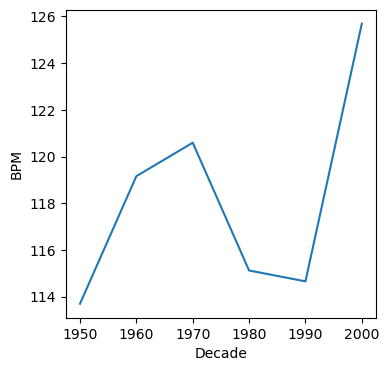

In [36]:
plt.figure(figsize=(4,4))
sns.lineplot(x='Decade',y='BPM',data=df.groupby('Decade')['BPM'].mean().reset_index())

## Length of music in decades
### Highest in 1980s with 3.75 per music length.
### Lowest in 1950s
### Gradually Increasing from 1950s to 1980s then gradually decreasing 


<AxesSubplot:xlabel='Decade', ylabel='Time'>

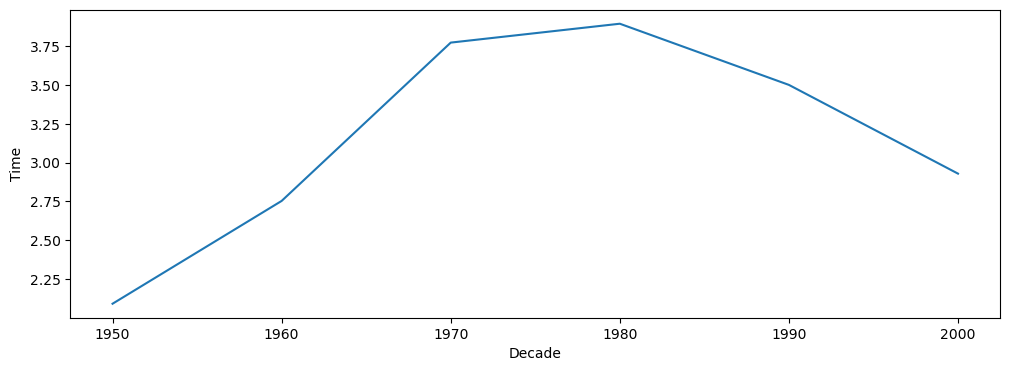

In [19]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Decade',y='Time',data=df.groupby('Decade')['Time'].mean().reset_index())

In [20]:
df['Time'].describe()

count    500.000000
mean       3.172000
std        1.436155
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: Time, dtype: float64

In [21]:
df.iloc[df['Time'].idxmax()-1]

Artist         Bob Dylan
Title     Desolation Row
Time                  11
BPM                110.4
Year                1965
Genre                TBD
Decade              1960
Name: 185, dtype: object

In [22]:
df.iloc[df['Time'].idxmin()-1]

Artist       Eddie Cochran
Title     Summertime Blues
Time                     1
BPM                  157.2
Year                  1970
Genre                 Rock
Decade                1970
Name: 73, dtype: object

In [38]:
df.iloc[df['Year'].idxmax()-1]

Artist    Roy Orbison
Title          Crying
Time                2
BPM              97.1
Year             2006
Genre             TBD
Decade           2000
Name: 69, dtype: object

## Greatest artist of decade


## 1950s

<AxesSubplot:ylabel='Artist'>

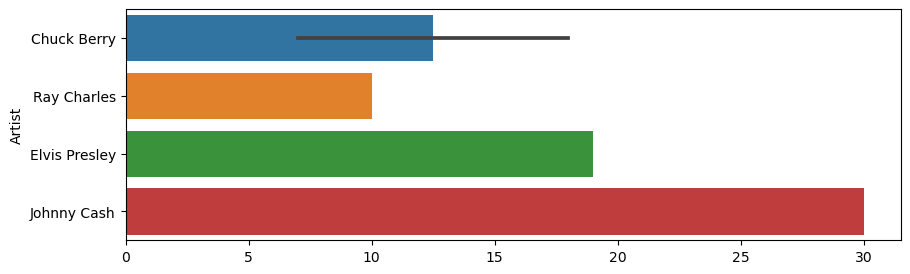

In [39]:
artist_1950s = df[df.Decade == 1950].nlargest(5, 'Decade')['Artist']
artist_1950s
f, ax = plt.subplots(figsize=(10,3))
sns.barplot(artist_1950s.index, artist_1950s)

# 1960s

<AxesSubplot:ylabel='Artist'>

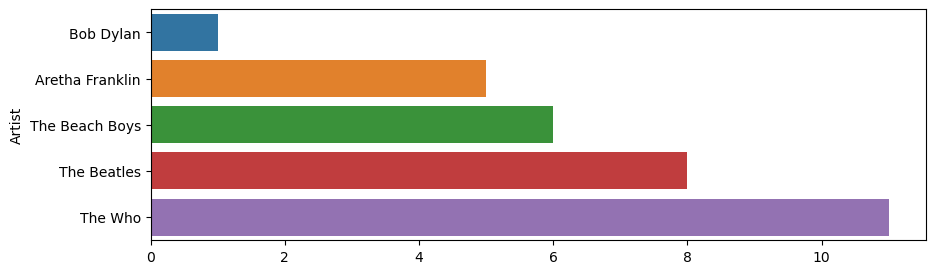

In [40]:
artist_1960s = df[df.Decade == 1960].nlargest(5, 'Decade')['Artist']
f, ax = plt.subplots(figsize=(10,3))
sns.barplot(artist_1960s.index, artist_1960s)


## 1970s

<AxesSubplot:ylabel='Artist'>

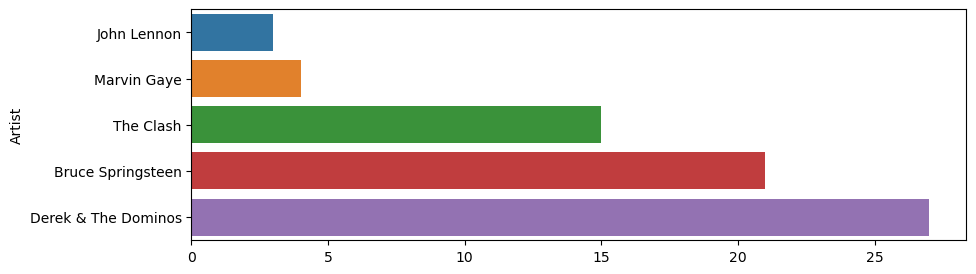

In [41]:
artist_1970s = df[df.Decade == 1970].nlargest(5, 'Decade')['Artist']
f, ax = plt.subplots(figsize=(10,3))
sns.barplot(artist_1970s.index, artist_1970s)

## 1980s

<AxesSubplot:ylabel='Artist'>

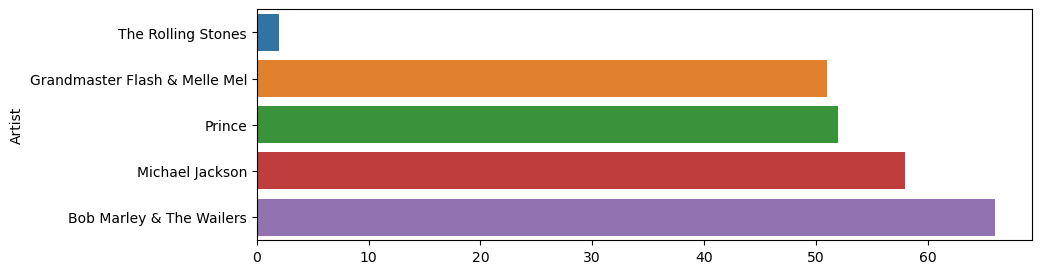

In [42]:
artist_1980s = df[df.Decade == 1980].nlargest(5, 'Decade')['Artist']
f, ax = plt.subplots(figsize=(10,3))
sns.barplot(artist_1980s.index, artist_1980s)


## 1990s

<AxesSubplot:ylabel='Artist'>

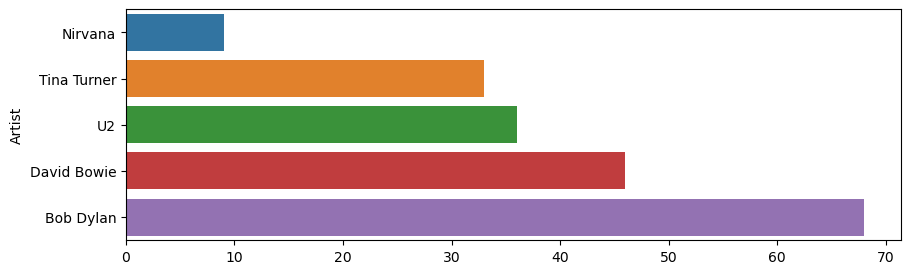

In [43]:
artist_1990s = df[df.Decade == 1990].nlargest(5, 'Decade')['Artist']
f, ax = plt.subplots(figsize=(10,3))
sns.barplot(artist_1990s.index, artist_1990s)


## 2000s

<AxesSubplot:ylabel='Artist'>

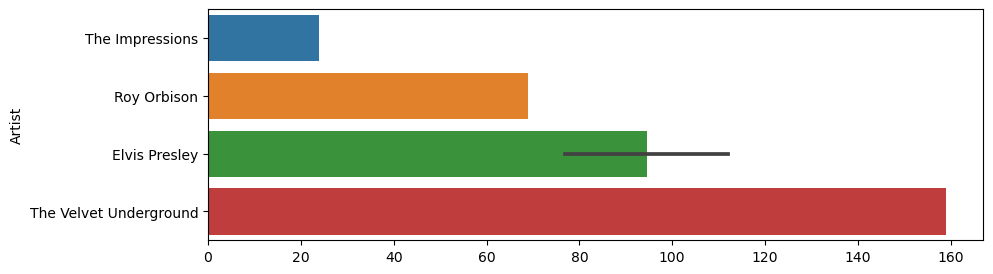

In [29]:
artist_2000s = df[df.Decade == 2000].nlargest(5, 'Decade')['Artist']
f, ax = plt.subplots(figsize=(10,3))
sns.barplot(artist_2000s.index, artist_2000s)